<a href="https://colab.research.google.com/github/dnguyend/MiscCollection/blob/main/colab/EinsteinRicciSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ricci Tensor and Einstein metrics on $SO(p)$ with left-invariant diagonal metrics.
We show examples of Einstein metrics arising from a simple formula for the Ricci tensor, when the metric on $SO(p)$ is given by $\langle A, A\rangle_P = \sum_{i<j}a_{ij}^2t_{ij}$ for a matrix $A=(a_{ij})_{1\leq i\leq p, 1\leq j\leq p}$ then the Ricci tensor is given by $Ric(A, A) = \sum_{i<j}a_{ij}^2r_{ij}$ with
$$r_{ij} = p-2+ \frac{1}{2}\sum_{l\neq i, l\neq j}\frac{t_{ij}^2-t_{il}^2-t_{jl}^2}{t_{il}t_{jl}}
$$

We can run the codes cell by cell but we can just follow the code without the run. Some cells do not return values as they may contain definition only.

* We implement the formulas, then check some metrics on $SO(9)$
* We show the family of 3 metrics in proposition 5.4 are Einstein (numerically).
* We do a quick introduction of the large output file of Einstein metrics for $SO(20)$. The cubic metric in proposition 5.4 were first found in this file.

First - the formulas. We keep the metric as either a vector $t$ of size $p(p-1)/2$, or a $p\times p$ symmetric matrix $Tmat$ with diagonal zero. makeTmat translates the vector to the matrix format

In [ ]:
import numpy as np
import contextlib
from scipy.optimize import minimize


def RicciCoeff(Tmat):
    # Tmat is the metric matrix
    p = Tmat.shape[0]
    nup = p*(p-1)//2
    ret = np.zeros(nup)
    ret[:] = p-2
    tx = np.triu_indices(p, 1)
    for kk in range(nup):
        i, j = tx[0][kk], tx[1][kk]
        for aa in range(p):
            if i != aa and aa != j:
                ret[kk] += -0.5*Tmat[j, aa]/Tmat[i, aa] - 0.5*Tmat[i, aa]/Tmat[j, aa]
                ret[kk] += 0.5*Tmat[i, j]*Tmat[i, j] / Tmat[i, aa]/Tmat[aa, j]

    return ret


def makeTmat(Tdiag):
  # translating from the vector Tdiag of size p(p-1)/2 to matrix for easier access
    p = .5 * (1 + np.sqrt(1 + 8 * len(Tdiag)))
    p = int(np.round(p))

    Tmat = np.zeros((p, p))
    tx = np.triu_indices(p, 1)
    Tmat[tx] = Tdiag
    Tmat[tx[1], tx[0]] = Tdiag
    return Tmat


@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally:
        np.set_printoptions(**original)


def pprint(mat, precision=4):
    """pretty print numpy matrix
    """
    with printoptions(precision=precision, suppress=True):
        print(mat)

We found the two Einstein metrics below for $SO(9)$. Later on we show Proposition 5.4 gives us three more metrics for SO(9)

In [20]:
def verify_so9():
    flgs = np.array([1, 1, 3, 4])
    Tdiag = [11.7750044, 3.49295668, 3.49295668,  3.49295668,
             11.00395784, 11.00395784, 11.00395784, 11.00395784,
             11.42167356, 11.42167356, 11.42167356,  4.85823252, 4.85823252,
             4.85823252,  4.85823252, 1., 1., 10.63219969, 10.63219969,
             10.63219969, 10.63219969, 1., 10.63219969, 10.63219969,
             10.63219969, 10.63219969,
             10.63219969, 10.63219969, 10.63219969, 10.63219969,
             2.07232593,  2.07232593, 2.07232593,
             2.07232593,  2.07232593, 2.07232593]
    
    p = flgs.sum()
    Tmat = makeTmat(Tdiag)
    rcf = RicciCoeff(Tmat)
    print('flag = %s' % flgs)
    print("coefficients")
    pprint(Tmat)
    lbd = rcf/Tdiag
    print("Ratios")
    pprint(makeTmat(lbd))
    
    print('Ratio =%.5f standard deviation = %f' % (lbd.min(), np.std(lbd)))
    
    flgs = np.array([1, 2, 3, 3])

    Tdiag = [11.41086965, 11.41086965, 10.83434028, 10.83434028, 10.83434028,
             3.50463883,  3.50463883,  3.50463883, 
             5.68181449,  4.25394966,  4.25394966,  4.25394966, 11.04723483,
             11.04723483, 11.04723483, 4.25394966,  4.25394966, 4.25394966,
             11.04723483, 11.04723483, 11.04723483, 1.02563286, 1.02563286,
             10.45556196, 10.45556196, 10.45556196, 1.02563286, 10.45556196,
             10.45556196, 10.45556196, 10.45556196, 10.45556196, 10.45556196,
             1., 1., 1.]
    p = flgs.sum()
    Tmat = makeTmat(Tdiag)
    rcf = RicciCoeff(Tmat)
    print('flag = %s' % flgs)    
    print("coefficients")
    pprint(Tmat)
    lbd = rcf/Tdiag
    print("Ratios")
    pprint(makeTmat(lbd))
    
    print('Ratio =%.5f standard deviation = %f' % (lbd.mean(), np.std(lbd)))
    
verify_so9()

flag = [1 1 3 4]
coefficients
[[ 0.     11.775   3.493   3.493   3.493  11.004  11.004  11.004  11.004 ]
 [11.775   0.     11.4217 11.4217 11.4217  4.8582  4.8582  4.8582  4.8582]
 [ 3.493  11.4217  0.      1.      1.     10.6322 10.6322 10.6322 10.6322]
 [ 3.493  11.4217  1.      0.      1.     10.6322 10.6322 10.6322 10.6322]
 [ 3.493  11.4217  1.      1.      0.     10.6322 10.6322 10.6322 10.6322]
 [11.004   4.8582 10.6322 10.6322 10.6322  0.      2.0723  2.0723  2.0723]
 [11.004   4.8582 10.6322 10.6322 10.6322  2.0723  0.      2.0723  2.0723]
 [11.004   4.8582 10.6322 10.6322 10.6322  2.0723  2.0723  0.      2.0723]
 [11.004   4.8582 10.6322 10.6322 10.6322  2.0723  2.0723  2.0723  0.    ]]
Ratios
[[0.     0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625]
 [0.5625 0.     0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625]
 [0.5625 0.5625 0.     0.5625 0.5625 0.5625 0.5625 0.5625 0.5625]
 [0.5625 0.5625 0.5625 0.     0.5625 0.5625 0.5625 0.5625 0.5625]
 [0.5625 0.5625 0.5625 

We now set up some functions for metric coming from a partition of $[1, p]_{\mathbb{N}}:=\{1,\cdots, p\}$. Here, $[1, p]_{\mathbb{N}}$ is divided to consecutive intervals $I_1\cdots I_q$, and $t_{ij}$ is only dependent on the partion set, ie if $i\in I_v, j\in I_w$ then $t_{ij} = t_{I_vI_w}$.

In [ ]:
def fill_up(val, d):
    ret = np.zeros((d, d))
    ret[np.triu_indices(d, 1)] = val
    return ret


def makeFF_idx(flgs):
    # Label a square matrix, deciding which variable goes to which block
    q = flgs.shape[0]
    n = flgs.sum()
    mat = np.zeros((n, n), dtype=int)
    mat[:flgs[0], :flgs[0]] = fill_up(1, flgs[0])
    rstart = 0
    cstart = 0
    wdim = 1
    for i in range(q):
        cstart = rstart
        for j in range(i, q):
            if i == j:        
                mat[rstart:rstart + flgs[i], cstart:cstart + flgs[i]] =\
                    fill_up(wdim, flgs[i])
                if flgs[i] > 1:
                    wdim += 1
            else:
                mat[rstart:rstart + flgs[i], cstart:cstart + flgs[j]] = wdim
                wdim += 1
            cstart += flgs[j]
        
        rstart += flgs[i]
    return mat[np.triu_indices(n, 1)][1:]-2, wdim-2



Now for the metric in proposition 5.4, $p = 2dk$ with $d\geq 1, k\geq 3$, $[1,\cdots p]_{\mathbb{N}}$ is divided to intervals $I_1,\cdots I_{2d}$ of length $k$. (we use $nd, nk$ for numerical values - instead of symbolic values in the functions below), then $t_{I_vI_v} = 1, t_{I_vI_w} = t_1$ if $|v - w| \equiv 1\mod 2$ and $t_{I_vI_w} = t_2$ if $|v - w| \equiv 0\mod 2$, $v\neq w$. Note when $d=1$ we do not have $t_2$. Note we are not solving the Einstein equation yet, these are just formating the metric parameters to an array given $t_1, t_2$

In [ ]:
def makeProp54metric(nd, nk, nt1, nt2):
  nnp = 2*nd*nk
  mat = np.ones((nnp, nnp))
  mat[np.arange(nnp), np.arange(nnp)] = 0
  for ii in range(2*nd):
    for jj in range(ii+1, 2*nd):
      if (jj - ii) % 2 == 1:
        mat[ii*nk:(ii+1)*nk, jj*nk:(jj+1)*nk] = nt1
      else:
        mat[ii*nk:(ii+1)*nk, jj*nk:(jj+1)*nk] = nt2
  tx = np.triu_indices(nnp, 1)
  mat[tx[1], tx[0]] = mat[tx]
  return mat
print("metric for d=%d k=%d t1=%f t2=%f" % (3, 3, 2, 3))
print(makeProp54metric(3, 3, 2, 3))
print("metric for d=%d k=%d t1=%f t2=%f" % (2, 3, 2, 3))
print(makeProp54metric(2, 3, 2, 3))
print("metric for d=%d k=%d t1=%f t2=%f" % (1, 3, 2, 3))
print(makeProp54metric(1, 3, 2, 3))

metric for d=3 k=3 t1=2.000000 t2=3.000000
[[0. 1. 1. 2. 2. 2. 3. 3. 3. 2. 2. 2. 3. 3. 3. 2. 2. 2.]
 [1. 0. 1. 2. 2. 2. 3. 3. 3. 2. 2. 2. 3. 3. 3. 2. 2. 2.]
 [1. 1. 0. 2. 2. 2. 3. 3. 3. 2. 2. 2. 3. 3. 3. 2. 2. 2.]
 [2. 2. 2. 0. 1. 1. 2. 2. 2. 3. 3. 3. 2. 2. 2. 3. 3. 3.]
 [2. 2. 2. 1. 0. 1. 2. 2. 2. 3. 3. 3. 2. 2. 2. 3. 3. 3.]
 [2. 2. 2. 1. 1. 0. 2. 2. 2. 3. 3. 3. 2. 2. 2. 3. 3. 3.]
 [3. 3. 3. 2. 2. 2. 0. 1. 1. 2. 2. 2. 3. 3. 3. 2. 2. 2.]
 [3. 3. 3. 2. 2. 2. 1. 0. 1. 2. 2. 2. 3. 3. 3. 2. 2. 2.]
 [3. 3. 3. 2. 2. 2. 1. 1. 0. 2. 2. 2. 3. 3. 3. 2. 2. 2.]
 [2. 2. 2. 3. 3. 3. 2. 2. 2. 0. 1. 1. 2. 2. 2. 3. 3. 3.]
 [2. 2. 2. 3. 3. 3. 2. 2. 2. 1. 0. 1. 2. 2. 2. 3. 3. 3.]
 [2. 2. 2. 3. 3. 3. 2. 2. 2. 1. 1. 0. 2. 2. 2. 3. 3. 3.]
 [3. 3. 3. 2. 2. 2. 3. 3. 3. 2. 2. 2. 0. 1. 1. 2. 2. 2.]
 [3. 3. 3. 2. 2. 2. 3. 3. 3. 2. 2. 2. 1. 0. 1. 2. 2. 2.]
 [3. 3. 3. 2. 2. 2. 3. 3. 3. 2. 2. 2. 1. 1. 0. 2. 2. 2.]
 [2. 2. 2. 3. 3. 3. 2. 2. 2. 3. 3. 3. 2. 2. 2. 0. 1. 1.]
 [2. 2. 2. 3. 3. 3. 2. 2. 2. 3. 3. 3. 2. 2. 2

We show the parameters $t1, t2$ from proposition 5.4 give us Einstein metrics

In [ ]:
def calc_ricci(nd, nk, nt1, nt2):
  nnp = 2*nd*nk
  nr0 = (nk - 2)/2 + nd*nk/2/nt1/nt1 + (nd-1)*nk/2/nt2/nt2
  nr1 = nnp - 2 - (nk-1)/nt1 + nk*(-nt2/nt1)*(2*nd-2)/2
  nr2 = nnp - 2 - (nk-1)/nt2 + nk*(nt2*nt2/nt1/nt1-2)*nd/2 + (nd-2)*(-1)*nk/2
  return nr0, nr1, nr2

def cubic_x(nd, nk):
  xk = np.zeros((4, 3))
  xk[3, 2] = 3*nd*nd- 2*nd
  xk[2, 2] = -nd*nd - 2*nd
  xk[2, 1] = 4*nd
  
  xk[1, 2] = 3*nd*nd + nd
  xk[1, 1] = -6*nd  - 2
  xk[1, 0] = 4
  xk[0, 2] = -nd*nd  - 3*nd
  xk[0, 1] = 6*nd + 2
  xk[0, 0] = -4

  xcoef = np.zeros(4)
  for i in range(3, -1, -1):
    xcoef[i] = np.poly1d(xk[i, :][::-1])(nk)
  rts = np.poly1d(xcoef[::-1]).r
  # print(np.poly1d(xcoef[::-1]))
  return rts[np.argsort(np.abs(rts.imag))[0]].real

def x2t(nd, nk, nx):
  return 2*(nk-1)*(nx  + 1)/nx/((-3*nd +  2)*nk*nx + 2*nk - 4 + nd*nk)
  
def solve_three_metrics(nd, nk):
  t1b = ((2*nd+1)*nk-2)/(nk-2)
  t2b = t1b

  t1c = (3*nd*nk-2)/(nd*nk-2)
  t2c = 1

  nxd = cubic_x(nd, nk)
  t1d = x2t(nd, nk, nxd)
  t2d = t1d*nxd

  return (t1b, t2b), (t1c, t2c), (t1d, t2d)

def check_einstein(nd, nk):
  em = solve_three_metrics(nd, nk)
  emb = makeProp54metric(nd, nk, *em[0])
  emc = makeProp54metric(nd, nk, *em[1])
  emd = makeProp54metric(nd, nk, *em[2])
  print("HERE are the metrics for d=%d k=%d on SO(%d)" % (nd, nk, 2*nd*nk))
  pprint(emb)
  pprint(emc)
  pprint(emd)
  display("Here are the ricci ratios/discrepencies (std)")
  ricb = RicciCoeff(emb)
  ricc = RicciCoeff(emc)
  ricd = RicciCoeff(emd)
  tx = np.triu_indices(2*nd*nk, 1)
  # pprint(makeTmat(ricd))
  # pprint(emd)

  if True:
    lbdb = ricb/emb[tx]
    print("B")
    print(lbdb.mean(), np.std(lbdb))

    lbdc = ricc/emc[tx]
    print("C")
    print(lbdc.mean(), np.std(lbdc))

    lbdd = ricd/emd[tx]
    print("D")
    print(lbdd.mean(), np.std(lbdd))

check_einstein(1, 5)


HERE are the metrics for d=1 k=5 on SO(10)
[[0.     1.     1.     1.     1.     4.3333 4.3333 4.3333 4.3333 4.3333]
 [1.     0.     1.     1.     1.     4.3333 4.3333 4.3333 4.3333 4.3333]
 [1.     1.     0.     1.     1.     4.3333 4.3333 4.3333 4.3333 4.3333]
 [1.     1.     1.     0.     1.     4.3333 4.3333 4.3333 4.3333 4.3333]
 [1.     1.     1.     1.     0.     4.3333 4.3333 4.3333 4.3333 4.3333]
 [4.3333 4.3333 4.3333 4.3333 4.3333 0.     1.     1.     1.     1.    ]
 [4.3333 4.3333 4.3333 4.3333 4.3333 1.     0.     1.     1.     1.    ]
 [4.3333 4.3333 4.3333 4.3333 4.3333 1.     1.     0.     1.     1.    ]
 [4.3333 4.3333 4.3333 4.3333 4.3333 1.     1.     1.     0.     1.    ]
 [4.3333 4.3333 4.3333 4.3333 4.3333 1.     1.     1.     1.     0.    ]]
[[0.     1.     1.     1.     1.     4.3333 4.3333 4.3333 4.3333 4.3333]
 [1.     0.     1.     1.     1.     4.3333 4.3333 4.3333 4.3333 4.3333]
 [1.     1.     0.     1.     1.     4.3333 4.3333 4.3333 4.3333 4.3333]
 [1.   

'Here are the ricci ratios/discrepencies (std)'

B
1.6331360946745568 2.8665835232995054e-16
C
1.6331360946745568 2.8665835232995054e-16
D
1.6331360946745572 3.4716050477471135e-16


More examples with different values of d and k

In [ ]:
check_einstein(2, 5)


HERE are the metrics for d=2 k=5 on SO(20)
[[0.     1.     1.     1.     1.     7.6667 7.6667 7.6667 7.6667 7.6667
  7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667]
 [1.     0.     1.     1.     1.     7.6667 7.6667 7.6667 7.6667 7.6667
  7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667]
 [1.     1.     0.     1.     1.     7.6667 7.6667 7.6667 7.6667 7.6667
  7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667]
 [1.     1.     1.     0.     1.     7.6667 7.6667 7.6667 7.6667 7.6667
  7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667]
 [1.     1.     1.     1.     0.     7.6667 7.6667 7.6667 7.6667 7.6667
  7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667]
 [7.6667 7.6667 7.6667 7.6667 7.6667 0.     1.     1.     1.     1.
  7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667 7.6667]
 [7.6667 7.6667 7.6667 7.6667 7.6667 1.     0.     1.     1.     1.
  7.6667 7.6667 7.6667 

'Here are the ricci ratios/discrepencies (std)'

B
1.627599243856333 7.240009060918754e-16
C
4.408163265306123 2.5531318447793203e-15
D
1.6393247079458693 1.2612281698341338e-15


In [ ]:
check_einstein(3, 6)

HERE are the metrics for d=3 k=6 on SO(36)
[[ 0.  1.  1. ... 10. 10. 10.]
 [ 1.  0.  1. ... 10. 10. 10.]
 [ 1.  1.  0. ... 10. 10. 10.]
 ...
 [10. 10. 10. ...  0.  1.  1.]
 [10. 10. 10. ...  1.  0.  1.]
 [10. 10. 10. ...  1.  1.  0.]]
[[0.   1.   1.   ... 3.25 3.25 3.25]
 [1.   0.   1.   ... 3.25 3.25 3.25]
 [1.   1.   0.   ... 3.25 3.25 3.25]
 ...
 [3.25 3.25 3.25 ... 0.   1.   1.  ]
 [3.25 3.25 3.25 ... 1.   0.   1.  ]
 [3.25 3.25 3.25 ... 1.   1.   0.  ]]
[[ 0.      1.      1.     ... 12.2728 12.2728 12.2728]
 [ 1.      0.      1.     ... 12.2728 12.2728 12.2728]
 [ 1.      1.      0.     ... 12.2728 12.2728 12.2728]
 ...
 [12.2728 12.2728 12.2728 ...  0.      1.      1.    ]
 [12.2728 12.2728 12.2728 ...  1.      0.      1.    ]
 [12.2728 12.2728 12.2728 ...  1.      1.      0.    ]]


'Here are the ricci ratios/discrepencies (std)'

B
2.149999999999999 2.5348490876283334e-15
C
8.852071005917157 1.0396945844731756e-14
D
2.184392549842848 3.0983359921802385e-15


In [ ]:
check_einstein(4, 5)

HERE are the metrics for d=4 k=5 on SO(40)
[[ 0.      1.      1.     ... 14.3333 14.3333 14.3333]
 [ 1.      0.      1.     ... 14.3333 14.3333 14.3333]
 [ 1.      1.      0.     ... 14.3333 14.3333 14.3333]
 ...
 [14.3333 14.3333 14.3333 ...  0.      1.      1.    ]
 [14.3333 14.3333 14.3333 ...  1.      0.      1.    ]
 [14.3333 14.3333 14.3333 ...  1.      1.      0.    ]]
[[0.     1.     1.     ... 3.2222 3.2222 3.2222]
 [1.     0.     1.     ... 3.2222 3.2222 3.2222]
 [1.     1.     0.     ... 3.2222 3.2222 3.2222]
 ...
 [3.2222 3.2222 3.2222 ... 0.     1.     1.    ]
 [3.2222 3.2222 3.2222 ... 1.     0.     1.    ]
 [3.2222 3.2222 3.2222 ... 1.     1.     0.    ]]
[[ 0.     1.     1.    ... 18.806 18.806 18.806]
 [ 1.     0.     1.    ... 18.806 18.806 18.806]
 [ 1.     1.     0.    ... 18.806 18.806 18.806]
 ...
 [18.806 18.806 18.806 ...  0.     1.     1.   ]
 [18.806 18.806 18.806 ...  1.     0.     1.   ]
 [18.806 18.806 18.806 ...  1.     1.     0.   ]]


'Here are the ricci ratios/discrepencies (std)'

B
1.5851811790156871 7.797626004760156e-15
C
9.963139120095123 3.76285023467348e-15
D
1.6150761349043634 3.790633075961554e-15


We now graph the metric coefficients $t_1, t_2$ for fixed $d$ and $k$

[[13.     13.      4.      1.     15.1544  9.2218]
 [ 9.      9.      3.6667  1.     10.2335  6.7299]
 [ 7.6667  7.6667  3.5     1.      8.6051  5.9007]
 [ 7.      7.      3.4     1.      7.7942  5.4866]
 [ 6.6     6.6     3.3333  1.      7.3089  5.2382]
 [ 6.3333  6.3333  3.2857  1.      6.986   5.0727]
 [ 6.1429  6.1429  3.25    1.      6.7556  4.9545]
 [ 6.      6.      3.2222  1.      6.583   4.8659]
 [ 5.8889  5.8889  3.2     1.      6.4489  4.797 ]
 [ 5.8     5.8     3.1818  1.      6.3416  4.7419]
 [ 5.7273  5.7273  3.1667  1.      6.2539  4.6968]
 [ 5.6667  5.6667  3.1538  1.      6.1809  4.6592]
 [ 5.6154  5.6154  3.1429  1.      6.1191  4.6274]
 [ 5.5714  5.5714  3.1333  1.      6.0662  4.6001]
 [ 5.5333  5.5333  3.125   1.      6.0203  4.5765]
 [ 5.5     5.5     3.1176  1.      5.9802  4.5559]
 [ 5.4706  5.4706  3.1111  1.      5.9448  4.5376]
 [ 5.4444  5.4444  3.1053  1.      5.9133  4.5214]
 [ 5.4211  5.4211  3.1     1.      5.8852  4.5069]
 [ 5.4     5.4     3.0952  1.  

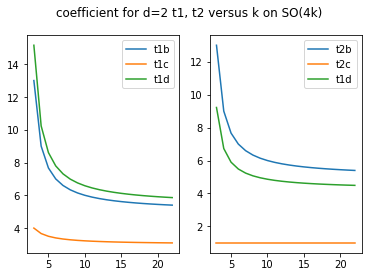

In [ ]:
import matplotlib.pyplot as plt
td = 2
N = 20
ank = np.arange(3, N+3)
ant = np.zeros((N, 6))
for ii in range(N):
  em3 = solve_three_metrics(td, ank[ii])
  for jj in range(3):
    ant[ii, 2*jj:2*jj+2] = np.array(em3[jj])
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(ank, ant[:, 0], label='t1b')
ax1.plot(ank, ant[:, 2], label='t1c')
ax1.plot(ank, ant[:, 4], label='t1d')

ax2.plot(ank, ant[:, 1], label='t2b')
ax2.plot(ank, ant[:, 3], label='t2c')
ax2.plot(ank, ant[:, 5], label='t1d')
fig.suptitle("coefficient for d=%d t1, t2 versus k on SO(%dk)" % (td, 2*td))
ax1.legend()
ax2.legend()
pprint(ant)

[[ 13.      13.       3.4      1.      16.3183   8.709 ]
 [ 17.      17.       3.2857   1.      22.6047  10.8396]
 [ 21.      21.       3.2222   1.      29.0026  13.0133]
 [ 25.      25.       3.1818   1.      35.4691  15.2053]
 [ 29.      29.       3.1538   1.      41.9812  17.4069]
 [ 33.      33.       3.1333   1.      48.5247  19.6142]
 [ 37.      37.       3.1176   1.      55.0911  21.825 ]
 [ 41.      41.       3.1053   1.      61.6745  24.0383]
 [ 45.      45.       3.0952   1.      68.2709  26.2532]
 [ 49.      49.       3.087    1.      74.8776  28.4695]
 [ 53.      53.       3.08     1.      81.4923  30.6867]
 [ 57.      57.       3.0741   1.      88.1136  32.9047]
 [ 61.      61.       3.069    1.      94.7404  35.1233]
 [ 65.      65.       3.0645   1.     101.3716  37.3423]
 [ 69.      69.       3.0606   1.     108.0066  39.5617]
 [ 73.      73.       3.0571   1.     114.6448  41.7815]
 [ 77.      77.       3.0541   1.     121.2858  44.0015]
 [ 81.      81.       3.0513   

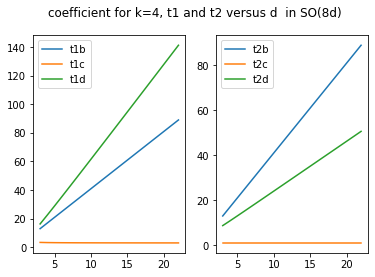

In [ ]:
tk = 4
N = 20
anD = np.arange(3, N+3)
antD = np.zeros((N, 6))
for ii in range(N):
  em3 = solve_three_metrics(anD[ii], tk)
  for jj in range(3):
    antD[ii, 2*jj:2*jj+2] = np.array(em3[jj])
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(anD, antD[:, 0], label='t1b')
ax1.plot(anD, antD[:, 2], label='t1c')
ax1.plot(anD, antD[:, 4], label='t1d')

ax2.plot(anD, antD[:, 1], label='t2b')
ax2.plot(anD, antD[:, 3], label='t2c')
ax2.plot(anD, antD[:, 5], label='t2d')
fig.suptitle("coefficient for k=%d, t1 and t2 versus d  in SO(%dd)" % (tk, 2*tk))
ax1.legend()
ax2.legend()
pprint(antD)

## The following is an extension of b) proposition 5.4 for the case $SO(qk)$ with both odd and even $q$, similar to [Andreas Arvanitoyeorgos, V. V. Dzhepko, and Yu. G. Nikonorov 2009]

In this case $t_1=t_2 = \frac{(q+1)k-2}{k-2}$

In [ ]:
def makeADN_SO_qk(nq, nk):
  nnp = nq*nk
  mat = np.ones((nnp, nnp))*((nq+1)*nk-2)/(nk-2)
  mat[np.arange(nnp), np.arange(nnp)] = 0
  for ii in range(nq):
        mat[ii*nk:(ii+1)*nk, ii*nk:(ii+1)*nk] = 1
  tx = np.triu_indices(nnp, 1)
  mat[tx[1], tx[0]] = mat[tx]
  return mat

adn_mat = makeADN_SO_qk(3, 5)
print("here is the metric")
print(adn_mat)
print("here is the ratio")
print(RicciCoeff(adn_mat)/adn_mat[np.triu_indices(adn_mat.shape[0], 1)])


here is the metric
[[1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 1. 1. 1. 1. 1.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 1. 1. 1. 1. 1.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 1. 1. 1. 1. 1.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 1. 1. 1. 1. 1.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 1. 1. 1. 1. 1.]]
here is the ratio
[1.63888889 1.63888889 1.63888889 1.63888889 1.63888889 1.63888889
 1.63888889 1.63888889 1.63888889 1.63888889 1.63888889 1.63888889
 1.63888889 1.63888889 1.63888889 1.63888889 1.63888889 1.63888889
 1.63888889 1.63888889 1.63888889 1.63888

## The following is an example of $SO(20)$
with a flag of length 5.  An extensive search with the code provided above returns numerous metrics for $SO(20)$ with different flag size, and it is a challenge to distinguish them.

In [ ]:
from google.colab import data_table
import pandas as pd

def so20():
  flgs = np.array([2, 3, 5, 5, 5])
  vals = np.array([1.        , 2.71654802, 2.61003108, 3.3950997 , 0.76562301,
           1.24752592, 0.94988487, 2.3171043 , 2.64821358, 0.37093517,
           2.19030637, 2.53940464, 0.31935525, 3.33608328, 0.3629275 ])

  p = flgs.sum()
  vec_idx, _ = makeFF_idx(flgs)
  # vec_idx has the first cell cut out. we append it in
  place = np.concatenate([np.zeros(1), vec_idx+1])
  Tdiag = np.ones(p*(p-1)//2)
  for i in range(vals.shape[0]):
    Tdiag[np.where(place == i)] = vals[i]

  # normalize setting smallest value to 1
  Tdiag = Tdiag/Tdiag.min()
  lbd = RicciCoeff(makeTmat(Tdiag))/Tdiag
  print("ratio mean=%f std=%", (lbd.mean(), np.std(lbd)))
  print("metric vector", Tdiag)
  print("metric matrix")
  
  
  return data_table.DataTable(pd.DataFrame(makeTmat(Tdiag)), num_rows_per_page=p)
so20()

ratio mean=%f std=% (1.6133980094931806, 3.152115174299956e-07)
metric vector [ 3.1313091   8.50635153  8.50635153  8.50635153  8.17281407  8.17281407
  8.17281407  8.17281407  8.17281407 10.63110658 10.63110658 10.63110658
 10.63110658 10.63110658  2.3974023   2.3974023   2.3974023   2.3974023
  2.3974023   8.50635153  8.50635153  8.50635153  8.17281407  8.17281407
  8.17281407  8.17281407  8.17281407 10.63110658 10.63110658 10.63110658
 10.63110658 10.63110658  2.3974023   2.3974023   2.3974023   2.3974023
  2.3974023   3.90638926  3.90638926  2.97438314  2.97438314  2.97438314
  2.97438314  2.97438314  7.25556978  7.25556978  7.25556978  7.25556978
  7.25556978  8.29237528  8.29237528  8.29237528  8.29237528  8.29237528
  3.90638926  2.97438314  2.97438314  2.97438314  2.97438314  2.97438314
  7.25556978  7.25556978  7.25556978  7.25556978  7.25556978  8.29237528
  8.29237528  8.29237528  8.29237528  8.29237528  2.97438314  2.97438314
  2.97438314  2.97438314  2.97438314  7.25556978

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,3.131309,8.506352,8.506352,8.506352,8.172814,8.172814,8.172814,8.172814,8.172814,10.631107,10.631107,10.631107,10.631107,10.631107,2.397402,2.397402,2.397402,2.397402,2.397402
1,3.131309,0.000000,8.506352,8.506352,8.506352,8.172814,8.172814,8.172814,8.172814,8.172814,10.631107,10.631107,10.631107,10.631107,10.631107,2.397402,2.397402,2.397402,2.397402,2.397402
2,8.506352,8.506352,0.000000,3.906389,3.906389,2.974383,2.974383,2.974383,2.974383,2.974383,7.255570,7.255570,7.255570,7.255570,7.255570,8.292375,8.292375,8.292375,8.292375,8.292375
3,8.506352,8.506352,3.906389,0.000000,3.906389,2.974383,2.974383,2.974383,2.974383,2.974383,7.255570,7.255570,7.255570,7.255570,7.255570,8.292375,8.292375,8.292375,8.292375,8.292375
4,8.506352,8.506352,3.906389,3.906389,0.000000,2.974383,2.974383,2.974383,2.974383,2.974383,7.255570,7.255570,7.255570,7.255570,7.255570,8.292375,8.292375,8.292375,8.292375,8.292375
5,8.172814,8.172814,2.974383,2.974383,2.974383,0.000000,1.161513,1.161513,1.161513,1.161513,6.858526,6.858526,6.858526,6.858526,6.858526,7.951661,7.951661,7.951661,7.951661,7.951661
6,8.172814,8.172814,2.974383,2.974383,2.974383,1.161513,0.000000,1.161513,1.161513,1.161513,6.858526,6.858526,6.858526,6.858526,6.858526,7.951661,7.951661,7.951661,7.951661,7.951661
7,8.172814,8.172814,2.974383,2.974383,2.974383,1.161513,1.161513,0.000000,1.161513,1.161513,6.858526,6.858526,6.858526,6.858526,6.858526,7.951661,7.951661,7.951661,7.951661,7.951661
8,8.172814,8.172814,2.974383,2.974383,2.974383,1.161513,1.161513,1.161513,0.000000,1.161513,6.858526,6.858526,6.858526,6.858526,6.858526,7.951661,7.951661,7.951661,7.951661,7.951661
9,8.172814,8.172814,2.974383,2.974383,2.974383,1.161513,1.161513,1.161513,1.161513,0.000000,6.858526,6.858526,6.858526,6.858526,6.858526,7.951661,7.951661,7.951661,7.951661,7.951661


## We ran a brute-force process and get around $1500$ potential Einstein metrics 


We will load the file then summarize the data

In [ ]:
!wget https://raw.githubusercontent.com/dnguyend/MiscCollection/main/colab/ricci_coeff_so20.csv

--2021-10-14 15:15:34--  https://raw.githubusercontent.com/dnguyend/MiscCollection/main/colab/ricci_coeff_so20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5933745 (5.7M) [text/plain]
Saving to: ‘ricci_coeff_so20.csv.1’

ricci_coeff_so20.cs 100%[===================>]   5.66M  --.-KB/s    in 0.08s   

2021-10-14 15:15:34 (69.0 MB/s) - ‘ricci_coeff_so20.csv.1’ saved [5933745/5933745]



In [ ]:
import csv
simfile = []
with open ('ricci_coeff_so20.csv') as ff:
  h = csv.reader(ff)
  for l in h:
    simfile.append(l)


# Recompute the Coefficient and the multipliers

In [ ]:
lbdmean = np.empty(len(simfile)-1)
lbdstd = np.empty(len(simfile)-1)
for i in range(len(simfile)-1):
  v = np.array([float(a) for a in simfile[i+1][1:191]])
  lbd = RicciCoeff(makeTmat(v))/v
  lbdmean[i] = lbd.mean()
  lbdstd[i] = np.std(lbd)

For each metric Ricci multipliers are practically constant
std of multiplier within a metric, over all metrics max=0.001852 meadian =0.000001 mean=0.000006


Text(0.5, 1.0, 'Distribution of Ricci multipliers')

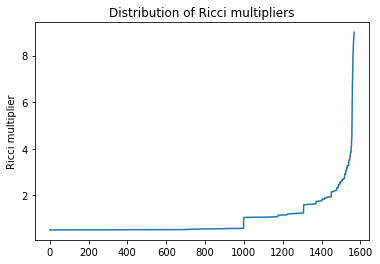

In [ ]:
import matplotlib.pyplot as plt
print("For each metric Ricci multipliers are practically constant")
print('std of multiplier within a metric, over all metrics max=%f meadian =%f mean=%f' % (lbdstd.max(), np.median(lbdstd), np.mean(lbdstd)))
fig, ax = plt.subplots()
ax.plot(np.arange(lbdmean.shape[0]), np.sort(lbdmean))
ax.set_ylabel("output line number")
ax.set_ylabel("Ricci multiplier")
ax.set_title("Distribution of Ricci multipliers")
# plt.plot(lbdmean)
# plt.plot(lbdmean[800:])

Each line in the csv file represents a metric, although there may be some duplication despite our best effort.

For each line - there are $190 = 19\times 20/2$  coefficients, and then the partition/flag that may be closest to the data, and then some strings indicating how we ran the sim (pls ignore) then the Ricci coefficient and its variation (standard deviation).

The next item is (nparams) is the total number of distinct coefficient for this line, and the relation  in the flag. In this case we have a metric that has the relation $t_{[11]} = t_{[22]}$, with 2 distinct parameters, $t_{ij} = 3.5$ ($90$ counts) and $t_{ij} = 1$ ($100$ counts). For the second line we have a metric with a partition $20=1 +19$, no further partition, there are $191$ values $= 1$ and $19$ values$=1.117$

In [ ]:
pd.DataFrame(np.array(simfile[2:4]).reshape(2, -1),columns =simfile[0] + ['cl'+ str(i) for i in range(3)])



,row,tval1,tval2,tval3,tval4,tval5,tval6,tval7,tval8,tval9,tval10,tval11,tval12,tval13,tval14,tval15,tval16,tval17,tval18,tval19,tval20,tval21,tval22,tval23,tval24,tval25,tval26,tval27,tval28,tval29,tval30,tval31,tval32,tval33,tval34,tval35,tval36,tval37,tval38,tval39,...,tval161,tval162,tval163,tval164,tval165,tval166,tval167,tval168,tval169,tval170,tval171,tval172,tval173,tval174,tval175,tval176,tval177,tval178,tval179,tval180,tval181,tval182,tval183,tval184,tval185,tval186,tval187,tval188,tval189,tval190,flag,flags_found,einst_coef,std,nparams,relations,param_val-freq-totparams,cl0,cl1,cl2
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,3.500000992992851,1.0,1.0,...,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,1.0000004599215817,[10 10],"['tryit20_1_1_1_1_1_6_9.npz', 11]",4.4081621268938225,5.736276978544251e-07,2,"[[(1, 1), (2, 2)]]",1.000000227376962,90,3.500000992992852,100
1,2,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.1176470588235425,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,[ 1 19],"['tryit20_1_1_1_17.npz', 2]",8.900277008310239,4.278033777464535e-15,2,[],1.0,171,1.1176470588235425,19


The next line is in row 26 in the table for $SO(20)$ which is the Einstein metric in Proposition 5.4, solution of the cubic equation, with $d=2, k = 5, p = 2dk = 20$. The expanded relation shows we divide the matrix to four $5\times 5$ blocks, with additional relations
 $t_{[11]} = t_{[22]} = t_{[33]} =t_{[44]}$ and $t_{[13]} = t_{[24]}$, $t_{[12]} = t_{[14]} = t_{[23]} = t_{[34]}$. This is the hint for us to consider the metric in proposition 5.4. The values are $40$ of $1$'s, $50$ of $5.9$ and $100$ of $8.695$

In [ ]:
display(pd.DataFrame(np.array(simfile[27:28]).reshape(1, -1)[:, 191:],columns =(simfile[0] + ['cl'+ str(i) for i in range(5)])[191:]))
display(simfile[27][196])

,flag,flags_found,einst_coef,std,nparams,relations,param_val-freq-totparams,cl0,cl1,cl2,cl3,cl4
0,[5 5 5 5],"['tryit20_5_5_5_5.npz', 19]",1.6393243407722857,1.4841114432360445e-07,3,"[[(1, 1), (2, 2), (3, 3), (4, 4)], [(1, 3), (2...",1.000000245809837,40,5.900742253635568,50,8.605082031935833,100


'[[(1, 1), (2, 2), (3, 3), (4, 4)], [(1, 3), (2, 4)], [(1, 2), (1, 4), (2, 3), (3, 4)]]'

It is easier to show the data in a data table, but best is to take the file and read in a spreadsheet like Excel or Google sheet - we show a bit more summary. The $4$ and $5$ parameter rows seem to be parts of families that can be generalized.
The sheet is in the same github folder

In [ ]:
df = pd.read_csv('ricci_coeff_so20.csv', usecols=np.arange(197), skiprows=0, header=0, names=simfile[0][:197], index_col=0)
df1 = df[df.nparams<=4]
df1.iloc[:, 190:]


,flag,flags_found,einst_coef,std,nparams,relations
row,,,,,,
0,[20],"['tryit20_1_1_1_17.npz', 8]",8.999996,0.000000e+00,1,[]
1,[10 10],"['tryit20_1_1_1_1_1_6_9.npz', 11]",4.408162,5.736277e-07,2,"[[(1, 1), (2, 2)]]"
2,[ 1 19],"['tryit20_1_1_1_17.npz', 2]",8.900277,4.278034e-15,2,[]
3,[ 3 17],"['tryit20_1_2_5_12.npz', 8]",0.513295,9.358234e-08,3,[]
4,[ 3 17],"['tryit20_1_1_1_17.npz', 0]",0.540424,1.012104e-09,3,[]
5,[ 4 16],"['tryit20_1_1_1_1_2_7_7.npz', 8]",1.046523,1.871294e-08,3,[]
6,[ 4 16],"['tryit20_1_1_1_1_1_1_14.npz', 0]",1.173585,1.350671e-09,3,[]
7,[ 5 15],"['tryit20_1_1_5_13.npz', 24]",1.593252,2.763222e-07,3,[]
8,[ 5 15],"['tryit20_1_1_1_1_1_1_14.npz', 4]",1.903021,5.920045e-08,3,[]
